In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib import ticker
from matplotlib.colors import LinearSegmentedColormap

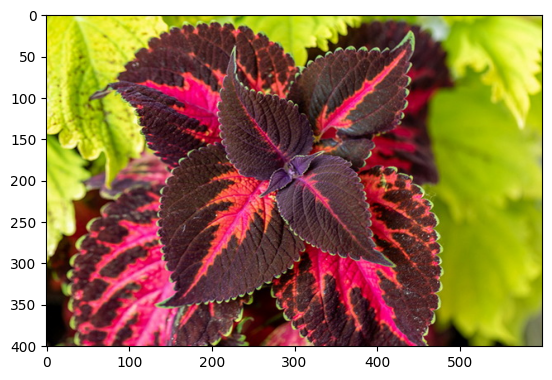

In [2]:
image1 = cv2.imread('image/4.jpg')
AAAA = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(AAAA)
plt.show()

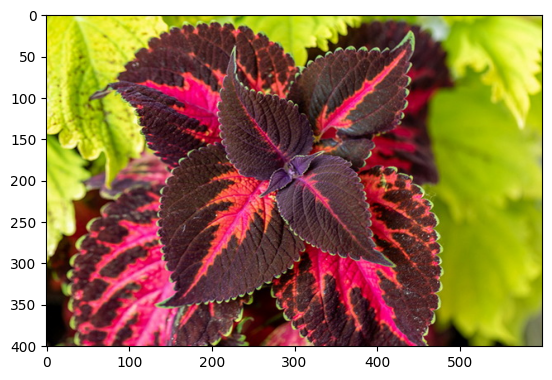

In [3]:
NIR = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
plt.imshow(NIR)
plt.show()

In [4]:
hsv_NIR = cv2.cvtColor(NIR, cv2.COLOR_RGB2HSV)

In [5]:
low_red = np.array([160, 105, 84])
high_red = np.array([179, 255, 255])

In [6]:
#create a binary mask and threshold the image using the selected colors

red_mask = cv2.inRange(hsv_NIR, low_red, high_red)

#keep every pixel the same as the original image

result = cv2.bitwise_and(NIR, NIR, mask=red_mask)

In [7]:
#NDVI Processing


ir = (result[:,:,0]).astype('float')


# Get one of the IR image bands (all bands should be same)
#blue = image[:, :, 2]

#r = np.asarray(blue, float)

r = (result[:,:,2]).astype('float')


ndvi = np.true_divide(np.subtract(ir, r), np.add(ir, r))



# Display the results
output_name = 'image/SegmentedInfraBlueNDVI.jpg'

#a nice selection of grayscale colour palettes
cols1 = ['blue', 'green', 'yellow', 'red']
cols2 =  ['gray', 'gray', 'red', 'yellow', 'green']
cols3 = ['gray', 'blue', 'green', 'yellow', 'red']

cols4 = ['black', 'gray', 'blue', 'green', 'yellow', 'red']

C:\Users\non_c\AppData\Local\Temp\ipykernel_18876\1958908419.py:15: RuntimeWarning: invalid value encountered in divide
  ndvi = np.true_divide(np.subtract(ir, r), np.add(ir, r))


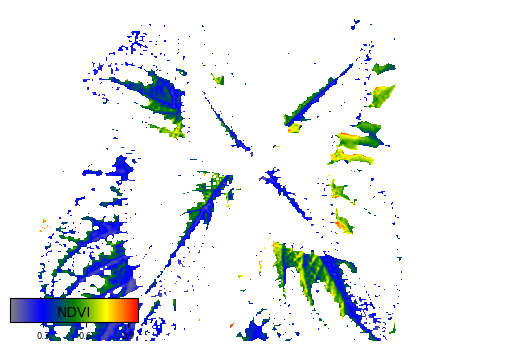

In [8]:
def create_colormap(args):
    return LinearSegmentedColormap.from_list(name='custom1', colors=cols3)

#colour bar to match grayscale units
def create_colorbar(fig, image):
        position = fig.add_axes([0.125, 0.19, 0.2, 0.05])
        norm = colors.Normalize(vmin=-1., vmax=1.)
        cbar = plt.colorbar(image,
                            cax=position,
                            orientation='horizontal',
                            norm=norm)
        cbar.ax.tick_params(labelsize=6)
        tick_locator = ticker.MaxNLocator(nbins=3)
        cbar.locator = tick_locator
        cbar.update_ticks()
        cbar.set_label("NDVI", fontsize=10, x=0.5, y=0.5, labelpad=-25)

fig, ax = plt.subplots()
image = ax.imshow(ndvi, cmap=create_colormap(colors))
plt.axis('off')

create_colorbar(fig, image)

extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig(output_name, dpi=600, transparent=True, bbox_inches=extent, pad_inches=0)
plt.show()
